## Time Series Analysis

In [110]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [32]:
date = datetime.date(year=2013,month=6,day=7)
time = datetime.time(hour=12,minute=30,second=19,microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7,hour=12, minute=30, second=19,microsecond=463198)
print("date is ", date)
print("time is", time)
print("datetime is", dt)

date is  2013-06-07
time is 12:30:19.463198
datetime is 2013-06-07 12:30:19.463198


In [33]:
td = datetime.timedelta(weeks=2,days=5,hours=10,minutes=20,seconds=6.73,milliseconds=99,microseconds=8)
print(td)

19 days, 10:20:06.829008


In [34]:
#Add this timedelta to the date and datetime objects
print('new date is', date + td)
print('new datetime is', dt + td)

new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


In [35]:
#pandas timestamp
print(pd.Timestamp(year=2012, month=12, day=21, hour=5,minute=10, second=8, microsecond=99))

print(pd.Timestamp('2016/1/10'))

print(pd.Timestamp('2014-5/10'))

print(pd.Timestamp('Jan 3, 2019 20:45.56'))

print(pd.Timestamp('2016-01-05T05:34:43.123456789'))

2012-12-21 05:10:08.000099
2016-01-10 00:00:00
2014-05-10 00:00:00
2019-01-03 20:45:33
2016-01-05 05:34:43.123456789


In [36]:
#Pandas to_datetime
print(pd.to_datetime('2015-5-13'))

print(pd.to_datetime('2015-13-5', dayfirst=True))

print(pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',format='Start Date: %b %d, %Y Start Time: %I:%M %p'))

print(pd.to_datetime(100, unit='D', origin='2013-1-1'))



2015-05-13 00:00:00
2015-05-13 00:00:00
2017-09-30 13:30:00
2013-04-11 00:00:00


In [37]:
s = pd.Series([10,100,1000,10000])
print(s)
s = pd.to_datetime(s,unit='D')
print(s)

0       10
1      100
2     1000
3    10000
dtype: int64
0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]


In [39]:
data_path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
data_path = data_path + 'crime.h5'
crime = pd.read_hdf(data_path,'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [40]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


In [41]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
GEO_LON,457296.0,-104.949973,1.243537,-105.300593,-105.009524,-104.982722,-104.929727,-0.000002
GEO_LAT,457296.0,39.726061,0.471636,0.000001,39.706890,39.739285,39.757689,39.904311
IS_CRIME,460911.0,0.728668,0.444648,0.000000,0.000000,1.000000,1.000000,1.000000
IS_TRAFFIC,460911.0,0.271855,0.444916,0.000000,0.000000,0.000000,1.000000,1.000000


In [42]:
crime['IS_CRIME'] = crime['IS_CRIME'].astype('int8')
crime['IS_TRAFFIC'] = crime['IS_TRAFFIC'].astype('int8')

In [43]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int8
IS_TRAFFIC             460911 non-null int8
dtypes: category(3), datetime64[ns](1), float64(2), int8(2)
memory usage: 16.7 MB


In [44]:
crime.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            460901, 460902, 460903, 460904, 460905, 460906, 460907, 460908,
            460909, 460910],
           dtype='int64', length=460911)

In [45]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [46]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460911 entries, 2014-06-29 02:01:00 to 2017-09-12 09:30:00
Data columns (total 7 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int8
IS_TRAFFIC             460911 non-null int8
dtypes: category(3), float64(2), int8(2)
memory usage: 13.2 MB


In [51]:
#select rows
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [55]:
crime.loc['2016-05-12'][::20]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 09:10:00,traffic-accident,traffic-accident,-104.943955,39.703761,belcaro,0,1
2016-05-12 09:42:00,traffic-accident,traffic-accident,-104.902747,39.761965,stapleton,0,1
2016-05-12 11:57:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.893950,39.683418,indian-creek,1,0
2016-05-12 06:51:00,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.961388,39.710275,washington-park,1,0
2016-05-12 16:19:00,traffic-accident,traffic-accident,-104.940507,39.780085,northeast-park-hill,0,1
2016-05-12 12:31:00,criminal-mischief-mtr-veh,public-disorder,-105.019005,39.779834,sunnyside,1,0
2016-05-12 15:52:00,traffic-accident-hit-and-run,traffic-accident,-105.041710,39.676804,harvey-park,0,1
2016-05-12 18:01:00,disturbing-the-peace,public-disorder,-104.750092,39.778058,gateway-green-valley-ranch,1,0


In [56]:
#select by month and year
crime.loc['2016-05'].shape

(8012, 7)

In [58]:
#slice by dates
crime.loc['2015-3-4':'2016-1-1'].sort_index().shape

(75403, 7)

In [61]:
#looking at the index
crime.index[:4]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00',
               '2014-06-29 02:00:00', '2014-06-29 02:18:00'],
              dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

In [65]:
#performance gain from sorting
%timeit crime.loc['2015-3-4':'2016-1-1']

29.1 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
crime_sort = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

917 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Using methods that only work with a DatetimeIndex

In [67]:
data_path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
data_path = data_path + 'crime.h5'
crime = pd.read_hdf(data_path,'crime').set_index('REPORTED_DATE')
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [68]:
crime.between_time('2:00','5:00',include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [69]:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [71]:
#first six months of crime data
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))[-5:]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
2012-07-01 00:01:00,robbery-street,robbery,-104.924292,39.767585,northeast-park-hill,1,0


In [75]:
crime_sort.loc[:'2012-06'][-5:]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


### Counting the number of weekly crimes
The raw Denver crime dataset is huge with over 460,000 rows each marked with a reported
date. Counting the number of weekly crimes is one of many queries that can be answered
by grouping according to some period of time. The resample method provides an easy
interface to grouping by any possible span of time

In [84]:
crime = pd.read_hdf(data_path,'crime').set_index('REPORTED_DATE').sort_index()

In [85]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In order to count the number of crimes per week, we need to form a group for
each week. The resample method takes a DateOffset object or alias and returns
an object ready to perform an action on all groups. The object returned from the
resample method is very similar to the object produced after calling the
groupby method:

In [82]:
crime_sort.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [94]:
#chain the size method to count the number of weekly crimes:
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes.head()


REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

now have the weekly crime count as a Series with the new index
incrementing one week at a time. There are a few things that happen by default
that are very important to understand. Sunday is chosen as the last day of the
week and is also the date used to label each element in the resulting Series. For
instance, the first index value January 8, 2012 is a Sunday. There were 877 crimes
committed during that week ending on the 8th. The week of Monday, January
9th to Sunday, January 15th recorded 1,071 crimes

In [95]:
#different day to end the week besides Sunday with an anchored offset:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

Nearly all the functionality of resample may be reproduced by the groupby method. The only difference is that you must pass the offset in the pd.Grouper object:

In [98]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [99]:
type(weekly_crimes_gby)

pandas.core.series.Series

In [107]:
#resample methods
r = crime_sort.resample('W')
res = [attr for attr in dir(r) if attr[0].islower()]

print(res)

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'nearest', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'plot', 'prod', 'sem', 'size', 'std', 'sum', 'transform', 'var']


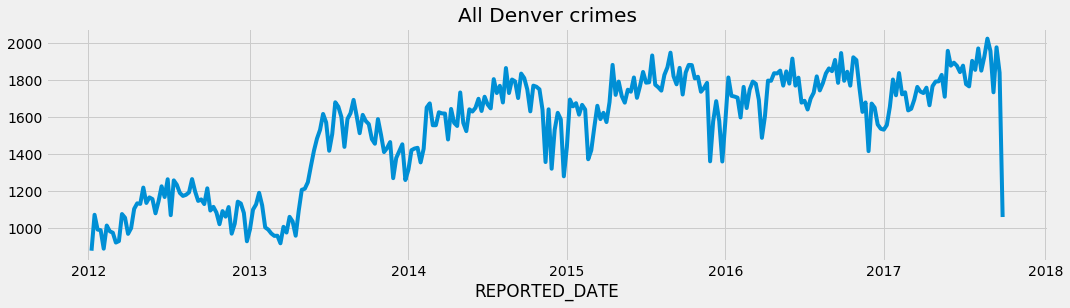

In [111]:
weekly_crimes.plot(figsize=(16,4),title='All Denver crimes')